In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
# Read data from file
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


<Axes: xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

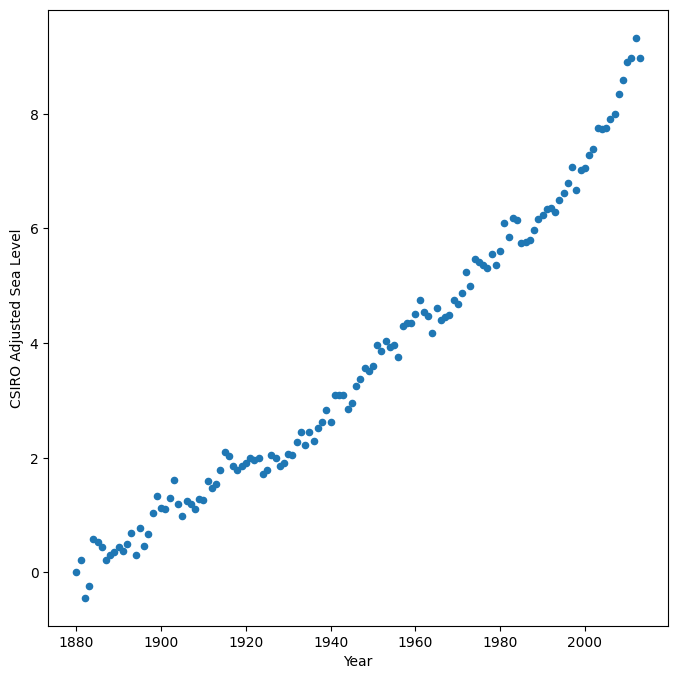

In [38]:
# Set up figure and axes
fig, ax = plt.subplots(1, figsize=(8, 8))

df.plot(kind="scatter", ax=ax, x='Year', y='CSIRO Adjusted Sea Level')

In [19]:
#Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.
linreg = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
slope = linreg.slope
intercept = linreg.intercept

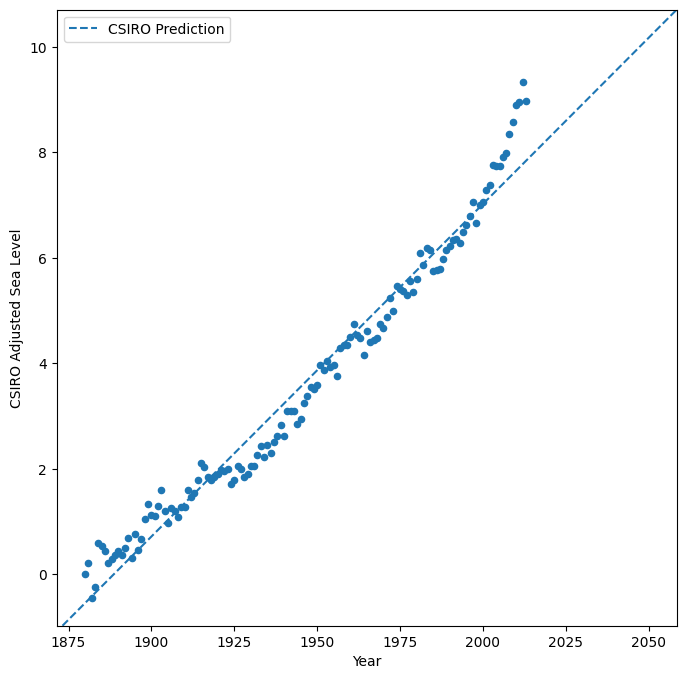

In [39]:
# Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050
ax.axline((2050, slope * 2050 + intercept), slope=slope, label='CSIRO Prediction', linestyle="dashed")
ax.legend()
fig

In [45]:
# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
df_limited = df[df['Year'] >= 2000]
df_limited.describe()

lim_linreg = linregress(x=df_limited['Year'], y=df_limited['CSIRO Adjusted Sea Level'])
lim_slope = lim_linreg.slope
lim_intercept = lim_linreg.intercept

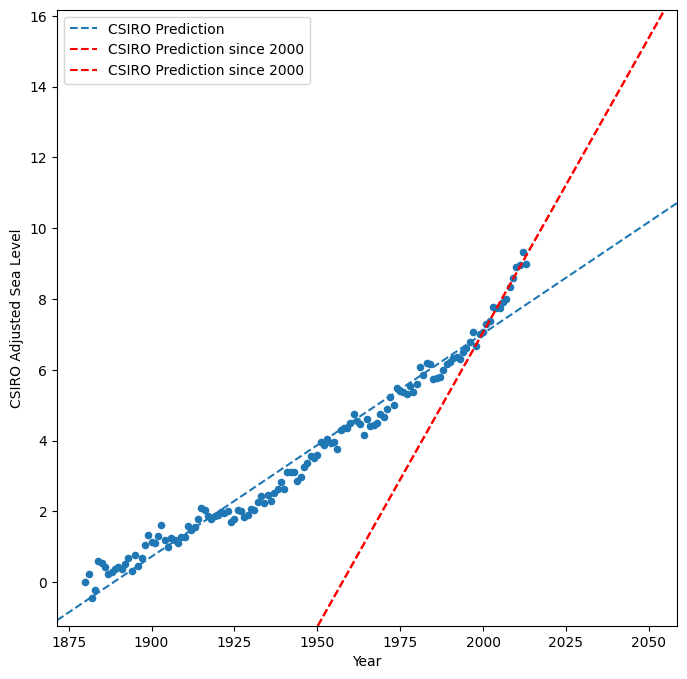

In [48]:
# Make the line also go through the year 2050 to predict the sea level rise in 2050 
#   if the rate of rise continues as it has since the year 2000.
ax.axline((2050, lim_slope * 2050 + lim_intercept), slope=lim_slope, color="red", label="CSIRO Prediction since 2000", linestyle="dashed")
ax.legend()

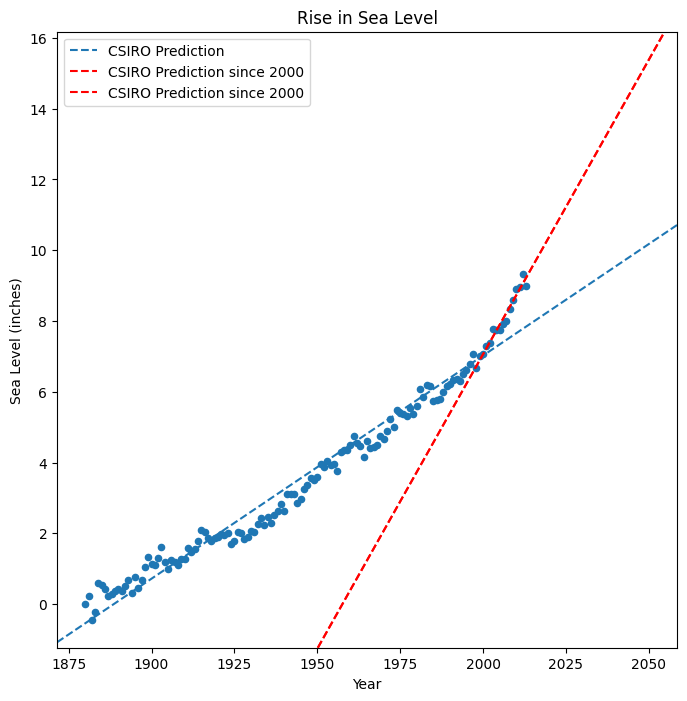

In [50]:
# The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
fig